
# 📘 Chapter 8: Logistic Regression

This chapter presents **Logistic Regression (LR)**, one of the most fundamental classification algorithms.  
Despite its name, Logistic Regression is a **linear classifier** that predicts probabilities using the logistic (sigmoid) function.  
The exposition follows a third-person, textbook style with LaTeX equations and runnable Python code.



## 8.1 Motivation

Linear regression can produce values outside the interval \([0,1]\), making it unsuitable for probability modeling.  
Logistic Regression solves this by applying the **logistic sigmoid function** to map any real-valued score into \([0,1]\).

The sigmoid function is defined as:
$$
\sigma(z) \;=\; \frac{1}{1 + e^{-z}}.
$$



## 8.2 Model Formulation

For input vector $(x \in \mathbb{R}^d$), parameters $(w \in \mathbb{R}^d$), and bias $(b$), the model computes:
$$
p(y=1 \mid x) \;=\; \sigma(w^\top x + b).
$$

For binary classification, the prediction rule is:
$$
\hat{y}(x) = 
\begin{cases}
1 & \text{if } p(y=1 \mid x) \geq 0.5, \\
0 & \text{otherwise.}
\end{cases}
$$



## 8.3 Log-Odds and Decision Boundary

Logistic regression models the **log-odds** (logit) of the positive class as a linear function:
$$
\log\frac{p(y=1 \mid x)}{1 - p(y=1 \mid x)} \;=\; w^\top x + b.
$$

The **decision boundary** is the hyperplane where $(w^\top x + b = 0$).  
Points on one side are classified as class 1, and those on the other as class 0.



## 8.4 Loss Function: Cross-Entropy

Parameters \(w, b\) are estimated by minimizing the **cross-entropy loss** over training examples \((x^{(i)}, y^{(i)})\):
$$
L(w,b) \;=\; -\frac{1}{N} \sum_{i=1}^N \Big[ y^{(i)} \log p(y^{(i)}\mid x^{(i)}) 
+ (1 - y^{(i)}) \log (1 - p(y^{(i)}\mid x^{(i)})) \Big].
$$

This loss corresponds to maximum likelihood estimation under the Bernoulli model.



## 8.5 Multiclass Logistic Regression (Softmax Regression)

For \(K\) classes, the model generalizes via the **softmax** function:
$$
p(y=k \mid x) \;=\; \frac{\exp(w_k^\top x + b_k)}{\sum_{j=1}^K \exp(w_j^\top x + b_j)}.
$$

The multiclass cross-entropy loss is then:
$$
L(W,b) = -\frac{1}{N}\sum_{i=1}^N \log p(y^{(i)} \mid x^{(i)}).
$$



## 8.6 Regularization

Regularization prevents overfitting by penalizing large weights.

- **L2 (Ridge)** regularization:
$$
L_{\text{reg}} = L + \lambda \|w\|_2^2.
$$

- **L1 (Lasso)** regularization:
$$
L_{\text{reg}} = L + \lambda \|w\|_1.
$$



## 8.7 Hands-On A: Binary Logistic Regression on Iris (two classes)


Accuracy on test set: 1.0


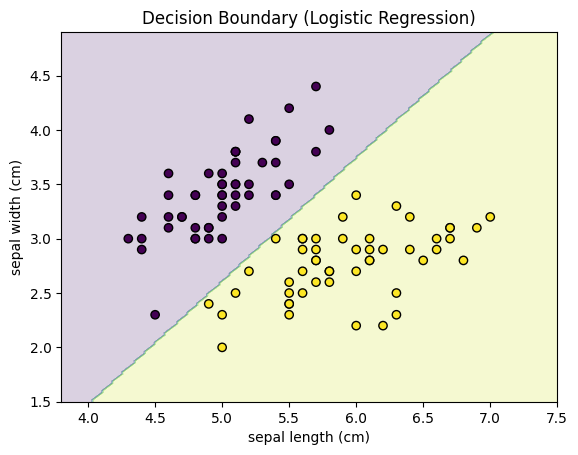

In [1]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Iris and select two classes (setosa vs versicolor)
iris = load_iris()
X = iris.data[iris.target < 2, :2]  # two features for visualization
y = iris.target[iris.target < 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit logistic regression
clf = LogisticRegression(solver="lbfgs")
clf.fit(X_train, y_train)

print("Accuracy on test set:", clf.score(X_test, y_test))

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k")
plt.title("Decision Boundary (Logistic Regression)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()



## 8.8 Hands-On B: Multiclass Logistic Regression on Full Iris


In [2]:

from sklearn.metrics import classification_report, confusion_matrix

# Full multiclass logistic regression
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

clf_multi = LogisticRegression(max_iter=500)
clf_multi.fit(X_train, y_train)

y_pred = clf_multi.predict(X_test)

print("Accuracy:", clf_multi.score(X_test, y_test))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9333333333333333

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


Confusion matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]



## 8.9 Summary

- Logistic Regression is a **linear probabilistic classifier** using the logistic or softmax function.  
- Parameters are learned via cross-entropy loss.  
- Regularization (L1/L2) helps control complexity.  
- Logistic Regression provides interpretable models and works well on linearly separable or near-separable data.  
- It remains a widely used baseline for classification tasks.
